# KeyPoints Detection(Step 1)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageFilter
from scipy.ndimage import gaussian_filter
import skimage.transform
from scipy import ndimage
import skimage.color
import cv2
from sklearn.decomposition import PCA

In [2]:
image1=io.imread('img1.png',as_gray = True)
image2=io.imread('img2.png',as_gray=True)

In [3]:
type(image1)

numpy.ndarray

In [4]:
def keypoints_detection(image):
    sigma = 1.5
    s = 10
    k = 2 ** (1 / (s - 1))
    Gaussian_filtered= [None] * s
    Dog_filtered = [None] * (s - 1)
    extremum_matrices = [None] * (s - 3)

    for i in range(s):
        Gaussian_filtered[i] = ndimage.gaussian_filter(image, sigma * (k ** i)) * 255
    for i in range(s - 1):
         Dog_filtered[i] = Gaussian_filtered[i + 1] - Gaussian_filtered[i]
    for i in range(s - 3):
        extremum_matrices[i] = extremas_get( Dog_filtered[i].copy(),  Dog_filtered[i+1].copy(),  Dog_filtered[i + 2].copy(), image.shape[0],image.shape[1])

    all_features = np.array(extremum_matrices)
    all_features = np.sum(all_features,axis = 0)
    all_features = all_features>=1
    no_of_features = np.sum(all_features)
    all_features= compute_keypoint_boolean_detection_matrix(all_features,image.shape[0],image.shape[1])

    return all_features,no_of_features

In [5]:
def extremas_get(layer_down, layer_main, layer_up, h, w):
    extremum_detection_matrix = np.zeros([h, w])
    is_extrema = -1
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            centre_val = layer_main[i,j]
            grid_main = layer_main[i-1:i+2,j-1:j+2]
            grid_up = layer_up[i-1:i+2,j-1:j+2]
            grid_down = layer_down[i-1:i+2,j-1:j+2]
            grid_main[1,1] = -1
            if(np.max(grid_main)<centre_val):
                if(centre_val>max(np.max(grid_up),np.max(grid_down))):
                    extremum_detection_matrix[i,j] = 1
            else:
                grid_main[1,1] = 256
                if(np.min(grid_main)>centre_val):
                    if(centre_val<min(np.min(grid_up),np.min(grid_down))):
                        extremum_detection_matrix[i,j] = 1
    return extremum_detection_matrix

In [6]:
def compute_keypoint_boolean_detection_matrix(features,height,weight):
    bool_matrix = np.zeros([height,weight])
    for i in range(1, height - 1):
        for j in range(1, weight - 1):
            if features[i, j] == 1:
                bool_matrix[i - 1:i + 2, j - 1:j + 2] = bool_matrix[i - 1:i + 2, j - 1:j + 2] + 1
    bool_matrix = bool_matrix >= 1
    return bool_matrix

In [7]:
detected_image1 = keypoints_detection(image1)
detected_image2 = keypoints_detection(image2)
detected_image1[1],detected_image2[1]

(10722, 1906)

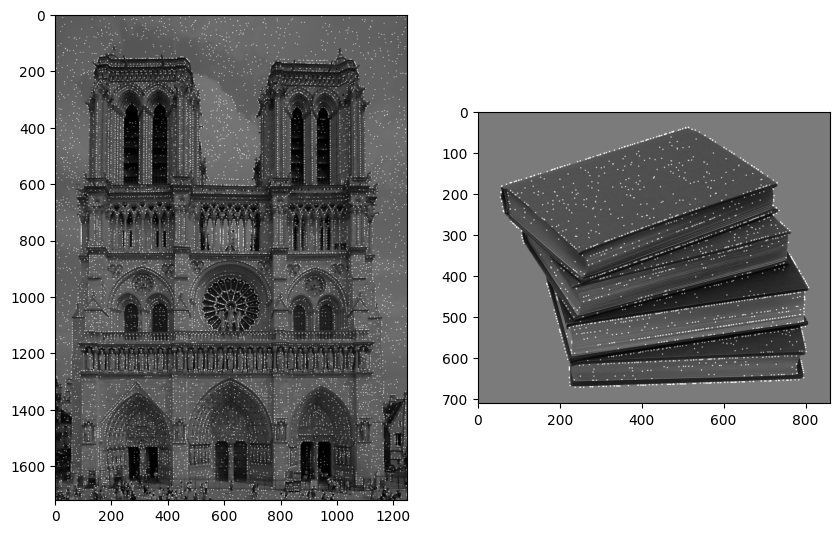

In [8]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(image1+detected_image1[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image2+detected_image2[0],cmap='gray')
plt.show()

# Orientation assignment (Step_2)

In [9]:
gaussian_filtered_image=ndimage.gaussian_filter(image1, sigma=1.5)
shape=gaussian_filtered_image.shape
gaussian_filtered_image

array([[0.68969274, 0.68878897, 0.68809975, ..., 0.73345022, 0.73341594,
        0.73371478],
       [0.68986162, 0.68913487, 0.68846701, ..., 0.73327494, 0.7330048 ,
        0.73313366],
       [0.68977519, 0.68930384, 0.68873055, ..., 0.73267798, 0.73217703,
        0.73208409],
       ...,
       [0.50857645, 0.50175496, 0.48826432, ..., 0.34114771, 0.31025687,
        0.28889298],
       [0.50181818, 0.49004292, 0.46917986, ..., 0.33046111, 0.28771237,
        0.25157865],
       [0.51414064, 0.49970276, 0.47432533, ..., 0.3309067 , 0.27829788,
        0.23078221]])

In [10]:
gaussian_filtered_image.shape

(1722, 1250)

In [11]:
data = detected_image2[0]
data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
data.shape

(712, 860)

In [13]:

true_indices = [(i, j) for i, row in enumerate(data) for j, value in enumerate(row) if value]
print(true_indices)


[(38, 511), (38, 512), (38, 513), (39, 504), (39, 505), (39, 506), (39, 511), (39, 512), (39, 513), (39, 514), (40, 504), (40, 505), (40, 506), (40, 507), (40, 511), (40, 512), (40, 513), (40, 514), (41, 504), (41, 505), (41, 506), (41, 507), (41, 512), (41, 513), (41, 514), (42, 497), (42, 498), (42, 499), (42, 504), (42, 505), (42, 506), (42, 507), (43, 497), (43, 498), (43, 499), (43, 520), (43, 521), (43, 522), (44, 491), (44, 492), (44, 493), (44, 497), (44, 498), (44, 499), (44, 520), (44, 521), (44, 522), (45, 487), (45, 488), (45, 489), (45, 491), (45, 492), (45, 493), (45, 520), (45, 521), (45, 522), (45, 528), (45, 529), (45, 530), (46, 487), (46, 488), (46, 489), (46, 491), (46, 492), (46, 493), (46, 528), (46, 529), (46, 530), (47, 487), (47, 488), (47, 489), (47, 528), (47, 529), (47, 530), (48, 475), (48, 476), (48, 477), (49, 472), (49, 473), (49, 474), (49, 475), (49, 476), (49, 477), (50, 471), (50, 472), (50, 473), (50, 474), (50, 475), (50, 476), (50, 477), (50, 538)

In [14]:
gaussian_filtered_image[38][511],data[38][511]

(0.8175404336911063, True)

In [15]:
def compute_keypoint_orientations(image, keypoints, patch_size=16):
    dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    magnitude = np.sqrt(dx ** 2 + dy ** 2)
    angle = np.arctan2(dy, dx) * 180 / np.pi
    orientations = []

    for kp in keypoints:
        x, y = kp[0], kp[1]
        if x < patch_size // 2 or y < patch_size // 2 or x >= image.shape[1] - patch_size // 2 or y >= image.shape[0] - patch_size // 2:
            continue

        hist = np.zeros(36)
        for j in range(-patch_size // 2, patch_size // 2 + 1):
            for k in range(-patch_size // 2, patch_size // 2 + 1):
                gradient_angle = angle[y + j, x + k]
                if gradient_angle < 0:
                    gradient_angle += 360
                histogram_index = int(gradient_angle // 10)
                hist[histogram_index] += magnitude[y + j, x + k]

        max_orientation_bin = np.argmax(hist)
        max_orientation = (max_orientation_bin * 10 + 5)/10
        orientations.append(max_orientation)

    return orientations

In [16]:
# Compute orientations for keypoints
keypoint_orientations = compute_keypoint_orientations(gaussian_filtered_image, true_indices)
keypoint_orientations

[33.5,
 33.5,
 33.5,
 29.5,
 29.5,
 29.5,
 33.5,
 33.5,
 33.5,
 33.5,
 29.5,
 29.5,
 29.5,
 29.5,
 33.5,
 33.5,
 33.5,
 33.5,
 30.5,
 30.5,
 30.5,
 29.5,
 33.5,
 33.5,
 33.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 33.5,
 33.5,
 33.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 33.5,
 32.5,
 32.5,
 29.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 33.5,
 32.5,
 32.5,
 29.5,
 29.5,
 28.5,
 29.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 28.5,
 28.5,
 28.5,
 29.5,
 30.5,
 30.5,
 28.5,
 28.5,
 28.5,
 31.5,
 31.5,
 30.5,
 31.5,
 31.5,
 31.5,
 30.5,
 30.5,
 30.5,
 31.5,
 31.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 27.5,
 27.5,
 27.5,
 31.5,
 31.5,
 31.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 30.5,
 28.5,
 28.5,
 28.5,
 31.5,
 31.5,
 31.5,
 30.5,
 30.5,
 30.5,
 30.5,
 28.5,
 28.5,
 28.5,
 31.5,
 31.5,
 31.5,
 12.5,
 6.5,
 33.5,
 33.5,
 31.5,
 31.5,
 31.5,
 12.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 12.

In [17]:
# Print orientations
for index, keypoint in enumerate(true_indices):
    print(f"Keypoint {index}: Orientation {keypoint_orientations[index]} degrees , keypint_loc{keypoint}")


Streaming output truncated to the last 5000 lines.
Keypoint 9644: Orientation 3.5 degrees , keypint_loc(499, 407)
Keypoint 9645: Orientation 3.5 degrees , keypint_loc(499, 408)
Keypoint 9646: Orientation 2.5 degrees , keypint_loc(499, 583)
Keypoint 9647: Orientation 2.5 degrees , keypint_loc(499, 584)
Keypoint 9648: Orientation 2.5 degrees , keypint_loc(499, 585)
Keypoint 9649: Orientation 8.5 degrees , keypint_loc(499, 625)
Keypoint 9650: Orientation 26.5 degrees , keypint_loc(499, 626)
Keypoint 9651: Orientation 26.5 degrees , keypint_loc(499, 627)
Keypoint 9652: Orientation 8.5 degrees , keypint_loc(499, 672)
Keypoint 9653: Orientation 8.5 degrees , keypint_loc(499, 673)
Keypoint 9654: Orientation 8.5 degrees , keypint_loc(499, 674)
Keypoint 9655: Orientation 17.5 degrees , keypint_loc(499, 757)
Keypoint 9656: Orientation 17.5 degrees , keypint_loc(499, 758)
Keypoint 9657: Orientation 17.5 degrees , keypint_loc(499, 759)
Keypoint 9658: Orientation 17.5 degrees , keypint_loc(499, 765

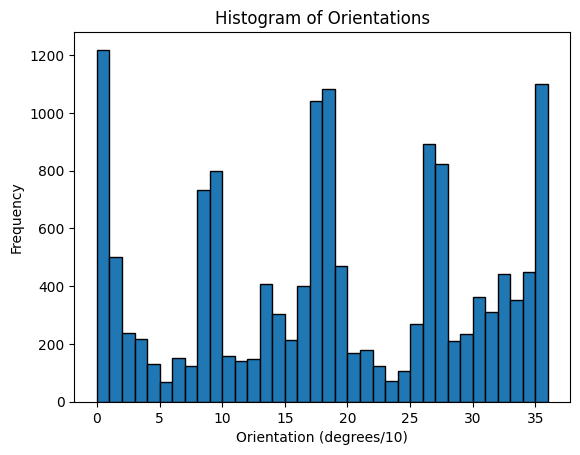

In [18]:
plt.hist(keypoint_orientations, bins=36, range=(0, 36),edgecolor='black')
plt.title('Histogram of Orientations')
plt.xlabel('Orientation (degrees/10)')
plt.ylabel('Frequency')
plt.show()

# PCA Discriptor (step 3)

In [19]:
def compute_pca_descriptors(image, keypoints, patch_size=(41, 41), num_components=64):
    pca_array = []
    for index, kp in enumerate(keypoints):
        keypoint_angle=keypoint_orientations[index]
        x, y = kp[0], kp[1]
        if x < patch_size[0] // 2 or y < patch_size[1] // 2 or x >= image.shape[1] - patch_size[0] // 2 or y >= image.shape[0] - patch_size[1] // 2:
            continue

        rotation_matrix = cv2.getRotationMatrix2D((x, y), keypoint_angle, 1.0)
        rotated_patch = cv2.warpAffine(image, rotation_matrix, (patch_size[0], patch_size[1]), flags=cv2.INTER_LINEAR)
        rotated_patch.resize(39,39)
        dx = cv2.Sobel(rotated_patch, cv2.CV_64F, 1, 0, ksize=3)
        dy = cv2.Sobel(rotated_patch, cv2.CV_64F, 0, 1, ksize=3)

        patch1 = dx.flatten()
        patch2 = dy.flatten()
        patch=np.concatenate((patch1, patch2))
        pca_array.append(patch)

    pca_array = np.array(pca_array)

    pca = PCA(n_components=num_components)
    discriptor_pca = pca.fit_transform(pca_array)

    return  discriptor_pca, pca_array



In [20]:
# Compute PCA descriptors for keypoints
after_pca, before_pca = compute_pca_descriptors(gaussian_filtered_image, true_indices)
before_pca

array([[0.        , 0.03816281, 0.03774493, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03706599, 0.0358056 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03615443, 0.03323673, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
before_pca.shape

(14644, 3042)

In [22]:
after_pca

array([[-1.17604920e+00, -2.30846073e+00, -2.82081319e-01, ...,
         9.02692887e-03, -1.44891506e-02, -1.18644949e-02],
       [-1.17344589e+00, -2.30642111e+00, -2.68430377e-01, ...,
         9.34940187e-03, -1.66829682e-02, -1.85033590e-02],
       [-1.17163465e+00, -2.30760100e+00, -2.57351177e-01, ...,
         8.76712879e-03, -1.85314309e-02, -2.39935999e-02],
       ...,
       [-1.23775625e+00, -1.89008585e+00,  7.17829180e-03, ...,
        -2.50788572e-03, -5.90372739e-03, -1.98087306e-03],
       [-1.23775625e+00, -1.89008585e+00,  7.17829180e-03, ...,
        -2.50788572e-03, -5.90372739e-03, -1.98087306e-03],
       [-1.23775625e+00, -1.89008585e+00,  7.17829180e-03, ...,
        -2.50788572e-03, -5.90372739e-03, -1.98087306e-03]])

In [23]:
after_pca.shape

(14644, 64)

#Applied on images

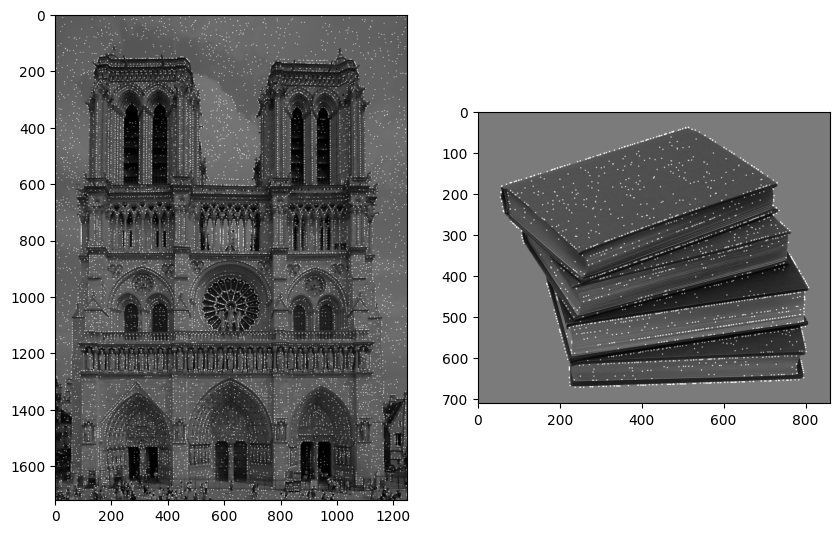

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(image1+detected_image1[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image2+detected_image2[0],cmap='gray')
plt.show()

In [25]:
detected_image1[1],detected_image2[1]

(10722, 1906)

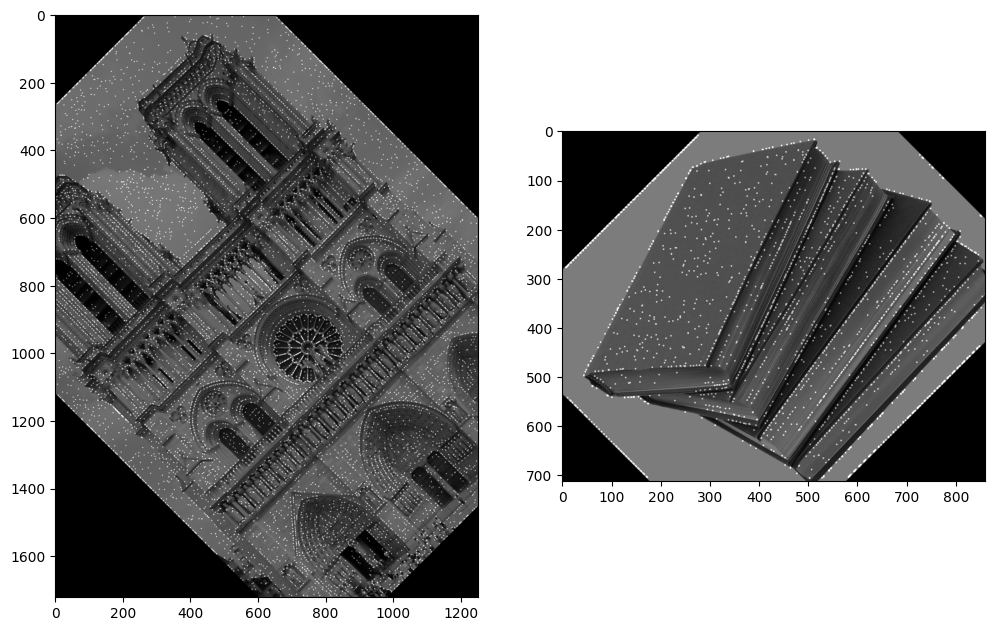

In [26]:
books_rotated = skimage.transform.rotate(image2, 45)
building_rotated = skimage.transform.rotate(image1, 45)
building_rotated_SIFT = keypoints_detection(building_rotated)
books_rotated_SIFT = keypoints_detection(books_rotated)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(building_rotated+building_rotated_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(books_rotated+books_rotated_SIFT[0],cmap='gray')
plt.show()

In [27]:
building_rotated_SIFT[1],books_rotated_SIFT[1]

(9229, 2288)

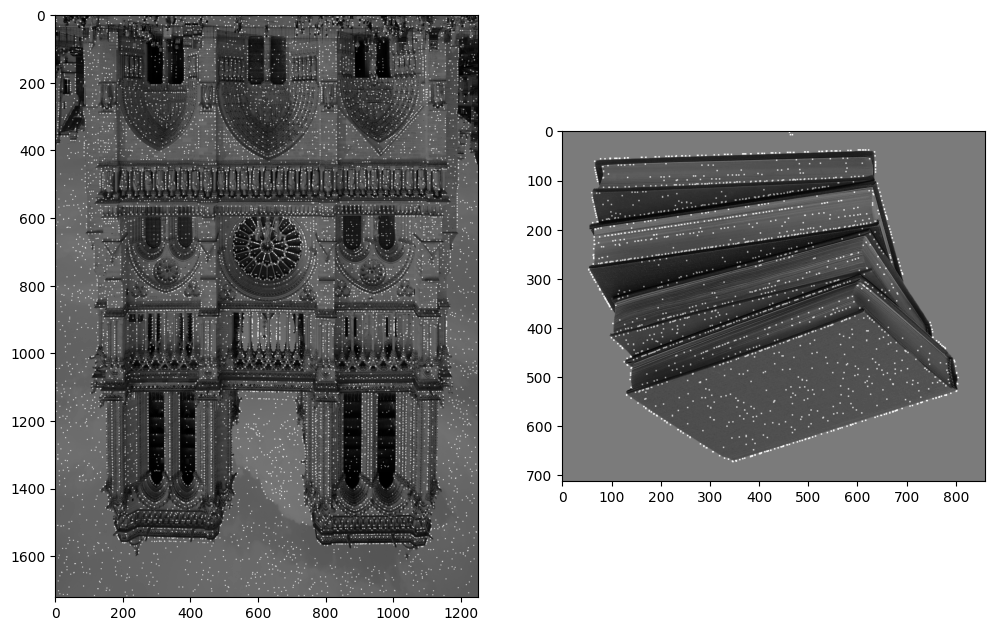

In [28]:
books_rotated180 = skimage.transform.rotate(image2, 180)
building_rotated180 = skimage.transform.rotate(image1, 180)
building_rotated180_SIFT = keypoints_detection(building_rotated180)
books_rotated180_SIFT = keypoints_detection(books_rotated180)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(building_rotated180+building_rotated180_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(books_rotated180+books_rotated180_SIFT[0],cmap='gray')
plt.show()

In [29]:
building_rotated180_SIFT[1],books_rotated180_SIFT[1]

(10727, 1852)

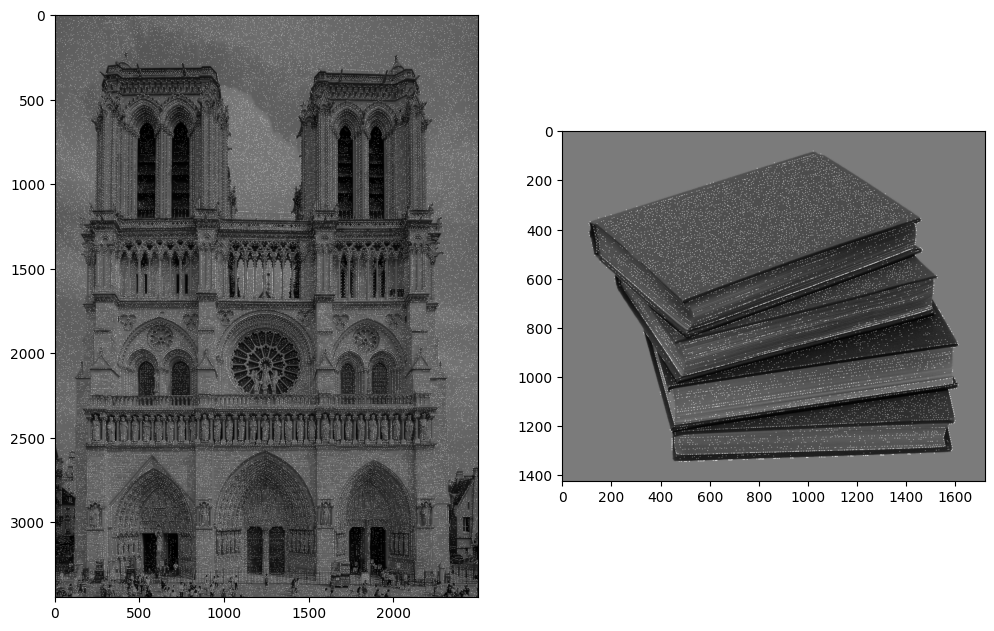

In [36]:
books_upscale = skimage.transform.rescale(image2, 2, anti_aliasing=False)
building_upscale = skimage.transform.rescale(image1, 2, anti_aliasing=False)
books_upscale_SIFT = keypoints_detection(books_upscale)
building_upscale_SIFT = keypoints_detection(building_upscale)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(building_upscale+building_upscale_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(books_upscale+books_upscale_SIFT[0],cmap='gray')
plt.show()

In [37]:
building_upscale_SIFT[1],books_upscale_SIFT[1]

(48068, 8466)

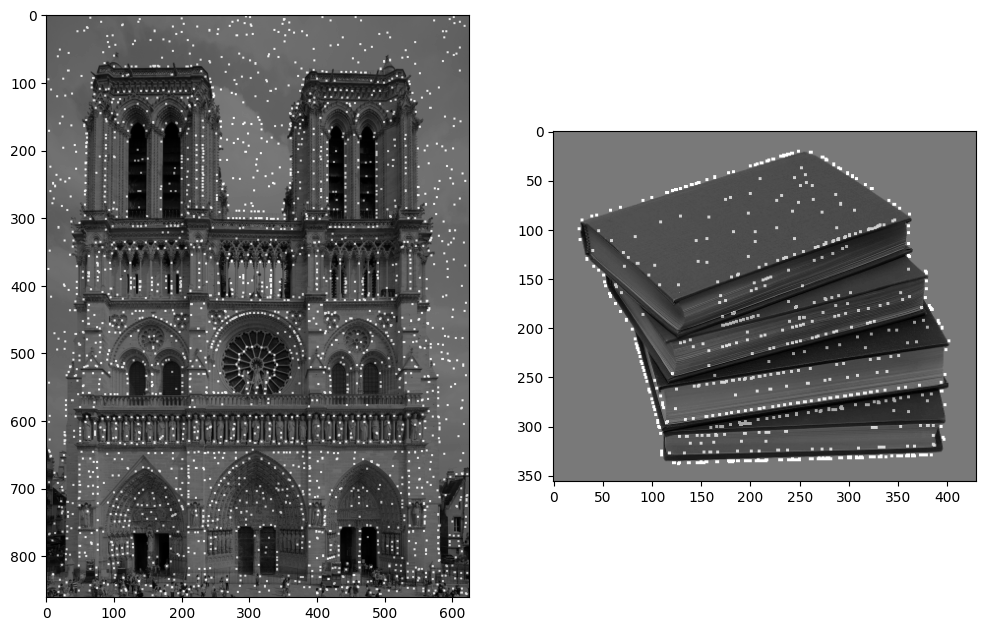

In [38]:
books_downscale = skimage.transform.rescale(image2, 0.5, anti_aliasing=False)
building_downscale = skimage.transform.rescale(image1, 0.5, anti_aliasing=False)
books_downscale_SIFT = keypoints_detection(books_downscale)
building_downscale_SIFT = keypoints_detection(building_downscale)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(building_downscale+building_downscale_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(books_downscale+books_downscale_SIFT[0],cmap='gray')
plt.show()

In [39]:
building_downscale_SIFT[1],books_downscale_SIFT[1]

(2700, 708)

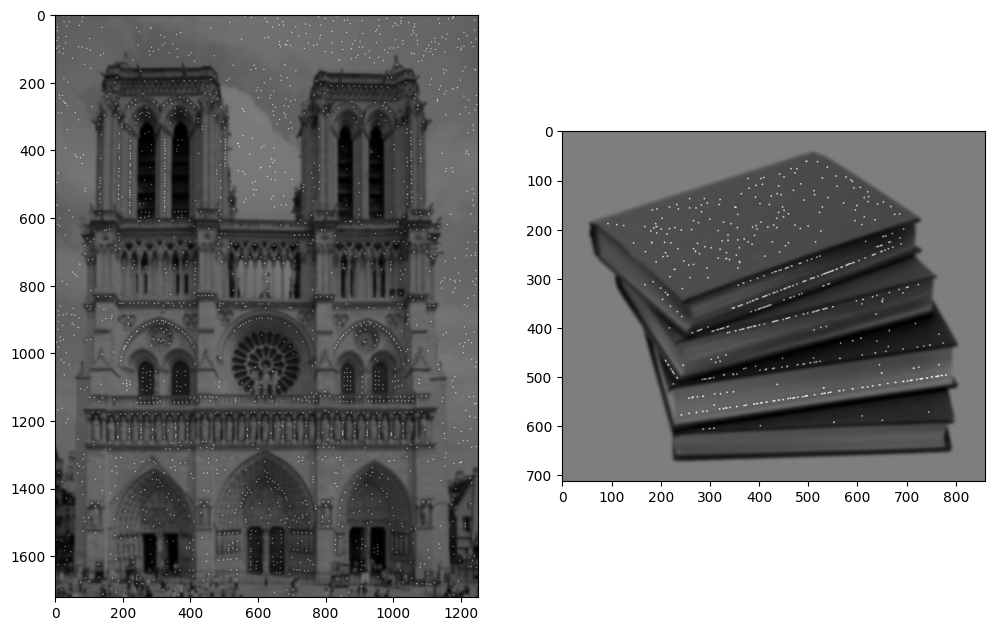

In [34]:
books_gaussianblur = ndimage.gaussian_filter(image2, 3)
building_gaussianblur = ndimage.gaussian_filter(image1, 3)
books_gaussianblur_SIFT = keypoints_detection(books_gaussianblur)
building_dgaussianblur_SIFT = keypoints_detection(building_gaussianblur)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(building_gaussianblur+building_dgaussianblur_SIFT[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(books_gaussianblur+books_gaussianblur_SIFT[0],cmap='gray')
plt.show()

In [35]:
building_dgaussianblur_SIFT[1],books_gaussianblur_SIFT[1]

(1985, 577)